<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/eii_u2_02_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/StudentPerformanceFactors.csv")
df.dropna(inplace=True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


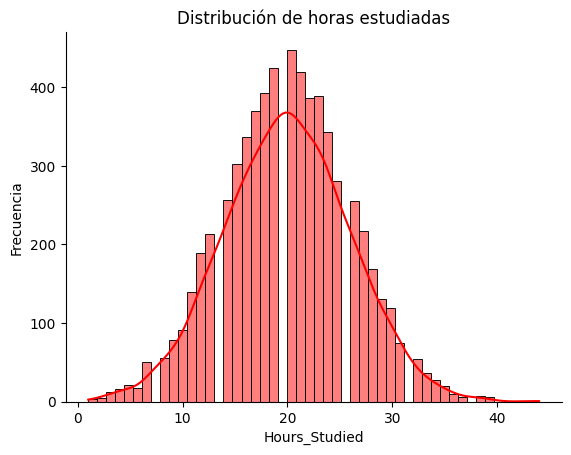

In [ ]:
#HOURS STUDIED
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Hours_Studied"], kde = True, color = "red")

plt.xlabel("Hours_Studied")
plt.ylabel("Frecuencia")
plt.title("Distribución de horas estudiadas")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

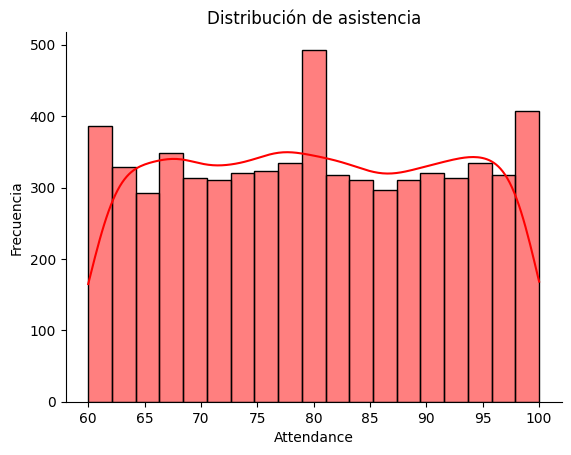

In [ ]:
#Attendance
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Attendance"], kde = True, color = "red")

plt.xlabel("Attendance")
plt.ylabel("Frecuencia")
plt.title("Distribución de asistencia")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [ ]:
#Parental_Involvement
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Exam_Score ~ C(Parental_Involvement)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2405.587354,1202.793677,80.462228,3.086485e-35
Residual,6375.0,95297.009071,14.948550,NaN,NaN


tukey



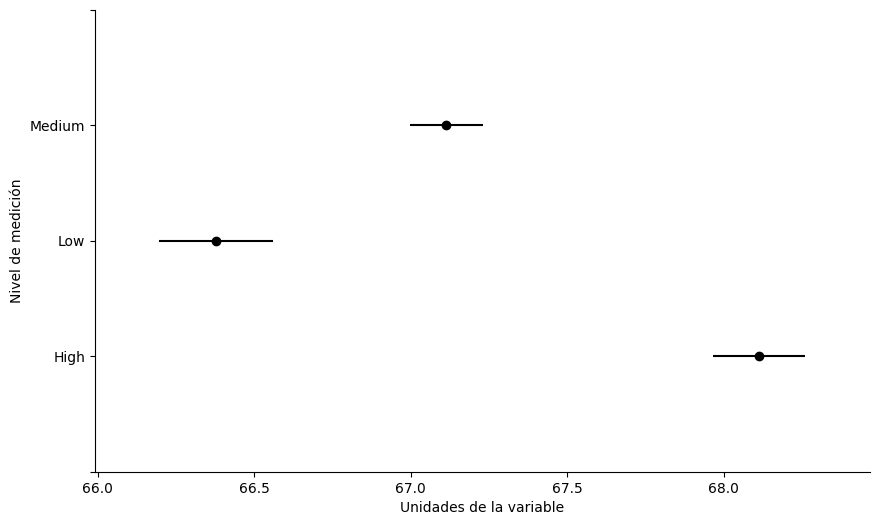

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df["Exam_Score"], groups = df["Parental_Involvement"], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = "Nivel de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print("tukey\n")

In [ ]:
import pandas as pd

niveles = {"Low": 0, "Medium": 50, "High": 100}
df["Parental_Involvement"] = df["Parental_Involvement"].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Access_to_Resources
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Exam_Score ~ C(Access_to_Resources)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2752.911147,1376.455574,92.41636,2.722170e-40
Residual,6375.0,94949.685278,14.894068,NaN,NaN


tukey



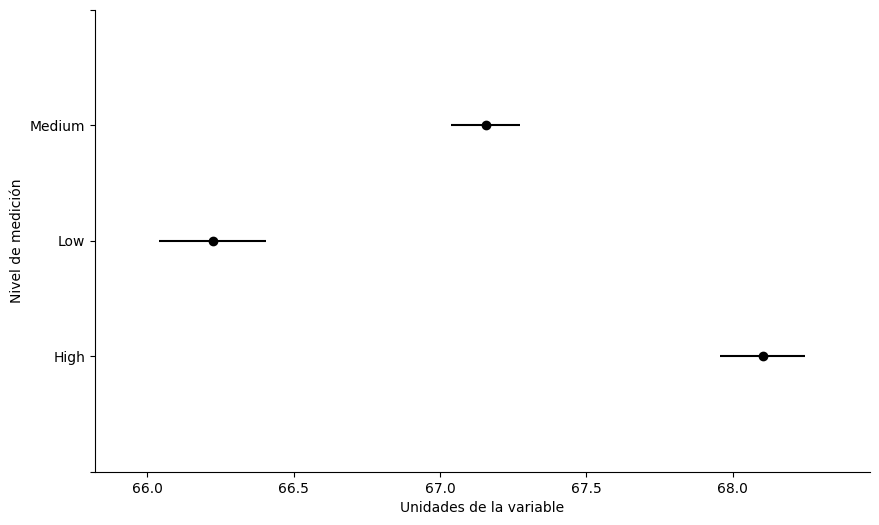

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df["Exam_Score"], groups = df["Access_to_Resources"], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = "Nivel de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print("tukey\n")

In [ ]:
import pandas as pd

niveles = {"Low": 0, "Medium": 50, "High": 100}
df["Access_to_Resources"] = df["Access_to_Resources"].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Extracurricular_Activities

import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/StudentPerformanceFactors.csv")
df.dropna(inplace=True)

modelo = smf.ols('Exam_Score ~ C(Extracurricular_Activities)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,388.552812,388.552812,25.457916,4.646554e-07
Residual,6376.0,97314.043614,15.262554,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


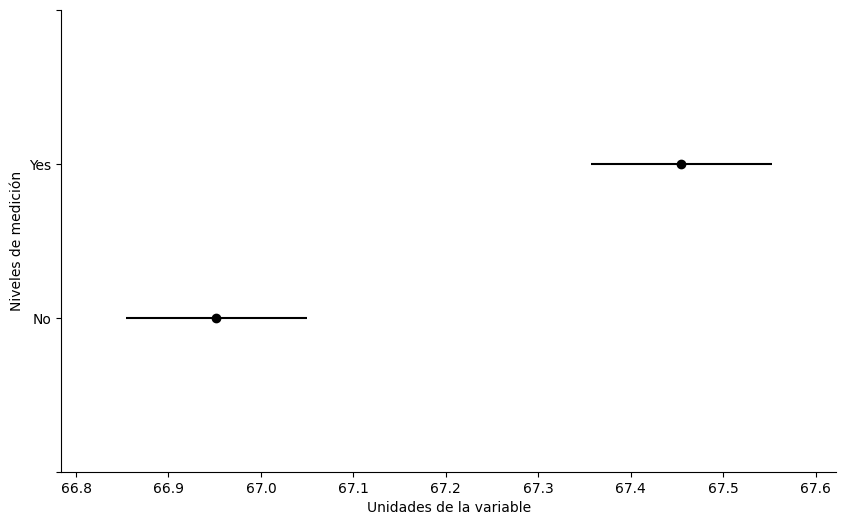

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Extracurricular_Activities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'No': 0, 'Yes': 1}
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


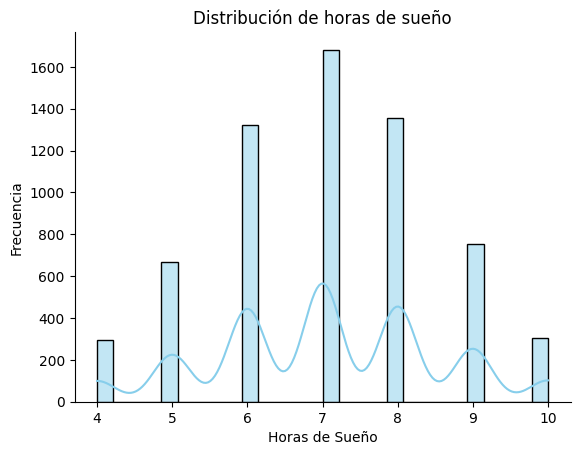

In [ ]:
#Sleep_Hours
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sleep_Hours'], kde=True, color='skyblue')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

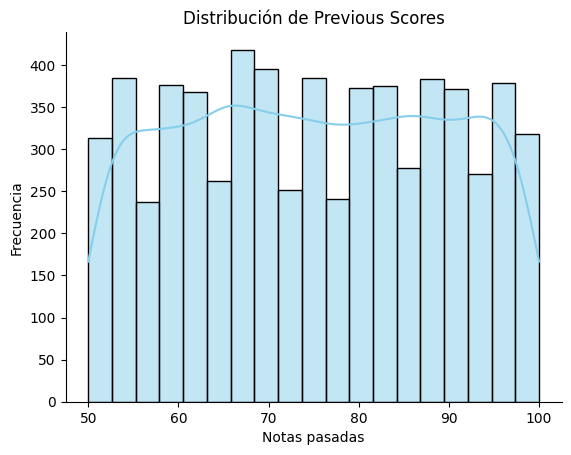

In [ ]:
#Previous_Scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Previous_Scores'], kde=True, color='skyblue')
plt.xlabel('Notas pasadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Previous Scores')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [ ]:
#Motivation_Level
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Motivation_Level)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.
#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Motivation_Level),2.0,776.488813,388.244407,25.535515,9.000204e-12
Residual,6375.0,96926.107612,15.204095,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9794    0.0 -1.3115 -0.6474   True
  High Medium   -0.405 0.0048 -0.7071  -0.103   True
   Low Medium   0.5744    0.0  0.3086  0.8402   True
----------------------------------------------------


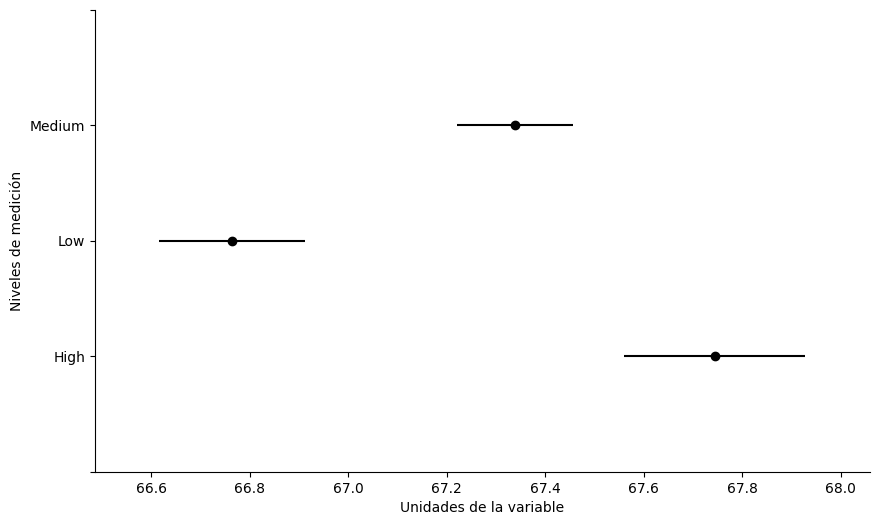

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Motivation_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Motivation_Level'] = df['Motivation_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Internet_Access
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Internet_Access)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.
#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Internet_Access),1.0,255.358422,255.358422,16.708173,0.000044
Residual,6376.0,97447.238003,15.283444,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


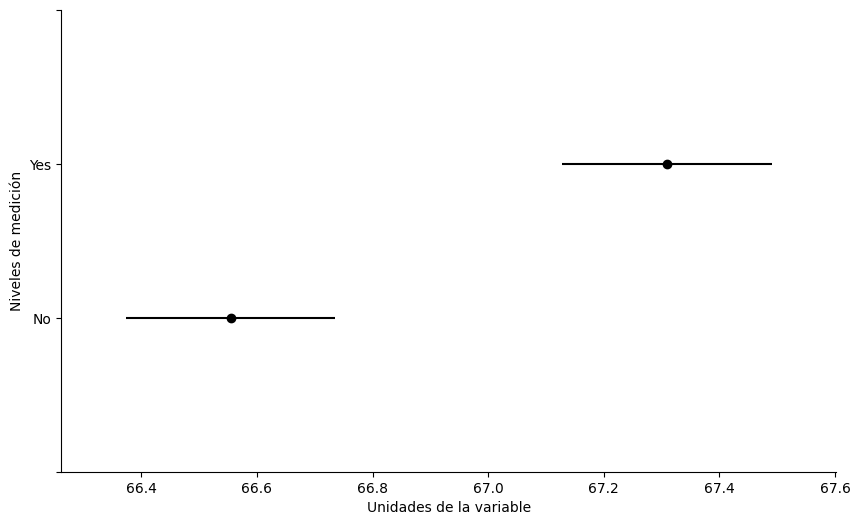

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Internet_Access'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Yes': 1, 'No': 0}
df['Internet_Access'] = df['Internet_Access'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


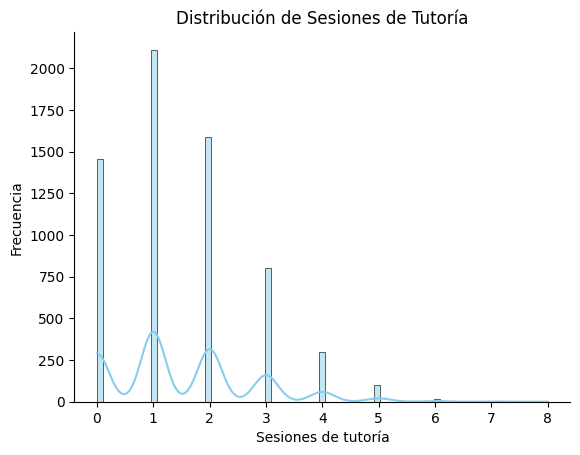

In [ ]:
#TUTORING SESSIONS
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tutoring_Sessions'], kde=True, color='skyblue')
plt.xlabel('Sesiones de tutoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sesiones de Tutoría')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [ ]:
#Family_Income
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Family_Income)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.
#Se rechaza la hipotesis nula.


,df,sum_sq,mean_sq,F,PR(>F)
C(Family_Income),2.0,874.339934,437.169967,28.782492,3.597672e-13
Residual,6375.0,96828.256491,15.188746,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9882    0.0 -1.3048 -0.6717   True
  High Medium  -0.4705 0.0015 -0.7873 -0.1536   True
   Low Medium   0.5178    0.0  0.2631  0.7725   True
----------------------------------------------------


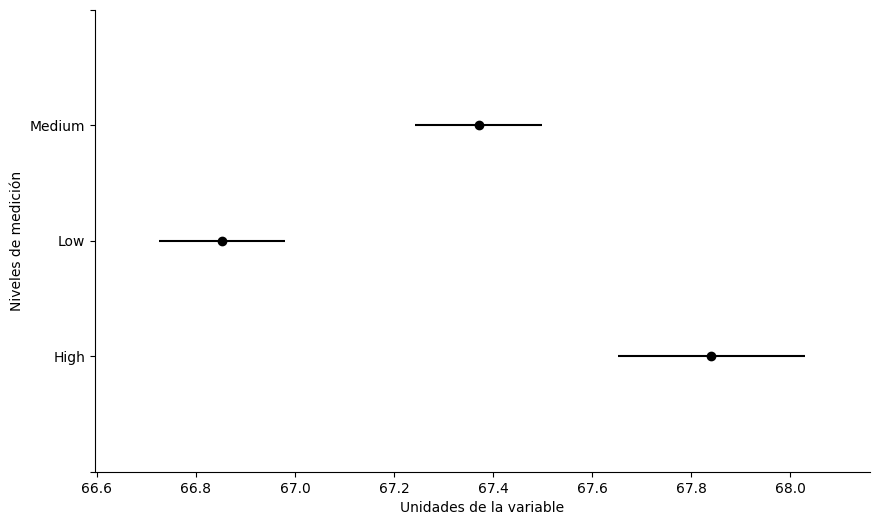

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Family_Income'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Family_Income'] = df['Family_Income'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Teacher_Quality
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Teacher_Quality)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.
#Se rechaza la hipotesis nula.

,df,sum_sq,mean_sq,F,PR(>F)
C(Teacher_Quality),2.0,566.739816,283.369908,18.59749,8.844704e-09
Residual,6375.0,97135.856609,15.236997,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   -0.906    0.0 -1.3224 -0.4896   True
  High Medium  -0.5632    0.0 -0.8198 -0.3066   True
   Low Medium   0.3428 0.0971 -0.0462  0.7318  False
----------------------------------------------------


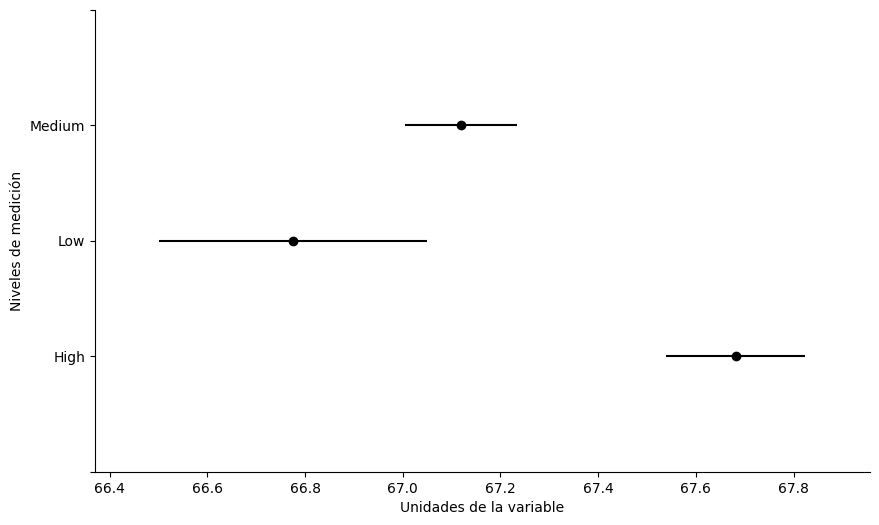

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Teacher_Quality'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Low': 0, 'Medium': 0, 'High': 100}
df['Teacher_Quality'] = df['Teacher_Quality'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,0,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,0,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,0,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,0,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,100,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,0,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,100,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,0,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,0,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#School_Type
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(School_Type)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.
#Se rechaza la hipotesis nula.

,df,sum_sq,mean_sq,F,PR(>F)
C(School_Type),1.0,11.540237,11.540237,0.753196,0.385499
Residual,6376.0,97691.056188,15.321684,NaN,NaN


In [5]:
niveles = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['School_Type'] = df['School_Type'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,NaN,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,NaN,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,NaN,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,NaN,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,NaN,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,NaN,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,NaN,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,NaN,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,NaN,Positive,3,No,High School,Far,Female,68


In [6]:
df.drop(columns = ['School_Type'], inplace = True)

In [ ]:
 #Prueba ANOVA para Peer_Influence
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Peer_Influence)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Peer_Influence),2.0,976.526155,488.263077,32.180333,1.242613e-14
Residual,6375.0,96726.070271,15.172717,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Negative  Neutral   0.6329    0.0 0.3229 0.9429   True
Negative Positive   1.0538    0.0  0.745 1.3626   True
 Neutral Positive   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


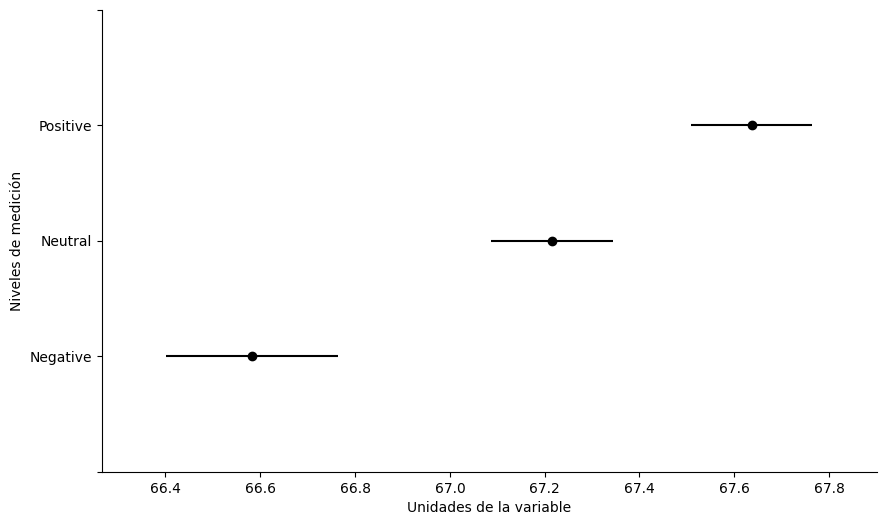

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Peer_Influence'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Peer_Influence'] = df['Peer_Influence'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,0,1,3,No,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,0,-1,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,0,0,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,0,-1,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,100,0,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,0,1,2,No,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,100,1,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,0,-1,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,0,1,3,No,High School,Far,Female,68


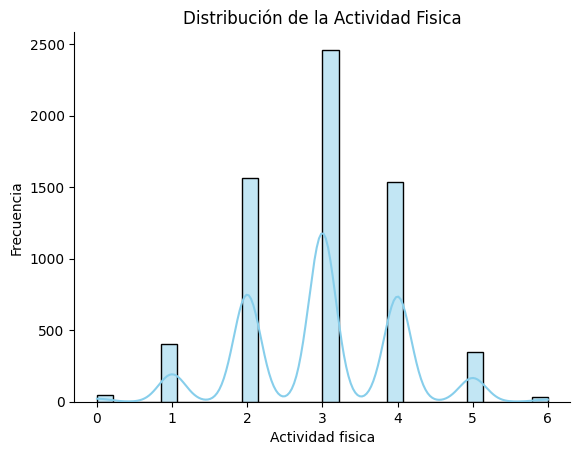

In [ ]:
#Physical_Activity
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Physical_Activity'], kde=True, color='skyblue')
plt.xlabel('Actividad fisica')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Actividad Fisica')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [ ]:
#Learning_Disabilities
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Learning_Disabilities)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Learning_Disabilities),1.0,687.937066,687.937066,45.212618,1.921126e-11
Residual,6376.0,97014.659360,15.215599,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


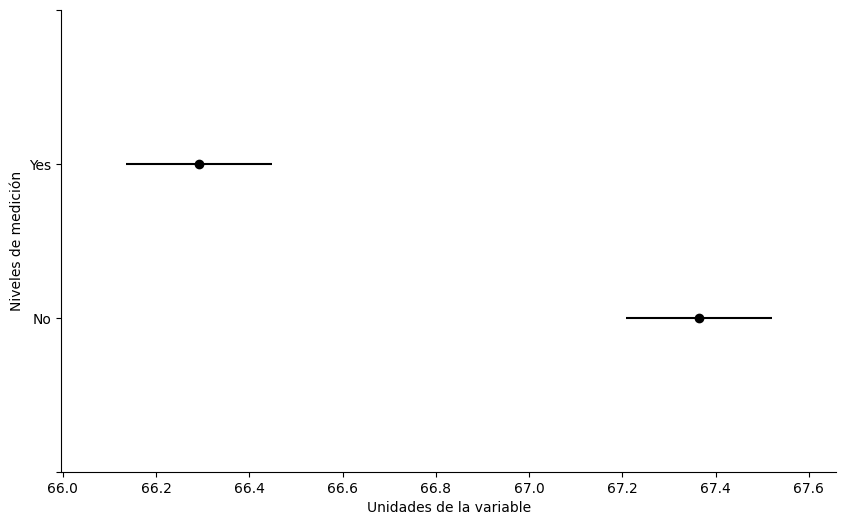

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Learning_Disabilities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'No': 0, 'Yes': 1}
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,0,1,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,0,-1,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,0,0,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,0,-1,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,100,0,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,0,1,2,0,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,100,1,2,0,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,0,-1,2,0,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,0,1,3,0,High School,Far,Female,68


In [ ]:
#Parental_Education_Level
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Parental_Education_Level)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Education_Level),2.0,1089.555877,544.777939,35.947108,2.990498e-16
Residual,6375.0,96613.040548,15.154987,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
    College  High School  -0.4635 0.0001 -0.7268 -0.2002   True
    College Postgraduate   0.6142    0.0  0.2856  0.9429   True
High School Postgraduate   1.0778    0.0  0.7754  1.3801   True
---------------------------------------------------------------


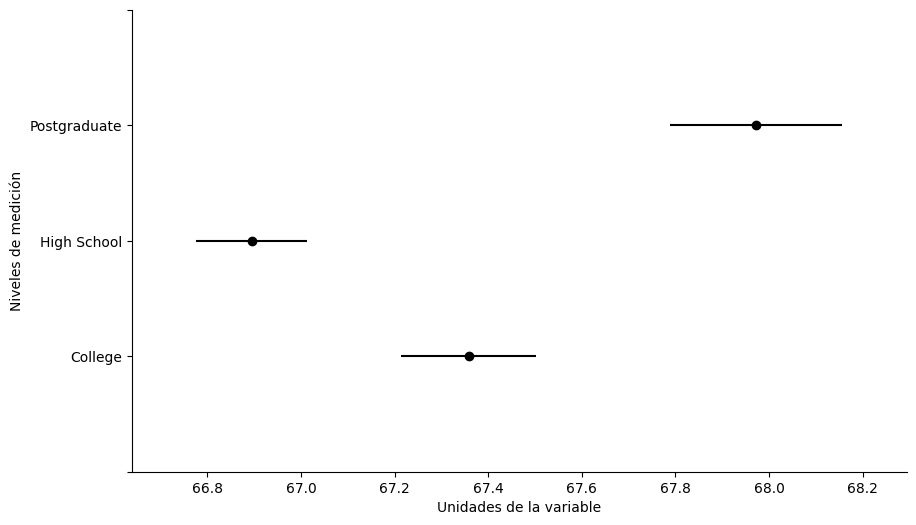

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Parental_Education_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'College': 0, 'High School': 50, 'Postgraduate': 100}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,0,1,3,0,50,Near,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,0,-1,4,0,0,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,0,0,4,0,100,Near,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,0,-1,4,0,50,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,100,0,4,0,0,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,0,1,2,0,50,Near,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,100,1,2,0,50,Near,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,0,-1,2,0,100,Near,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,0,1,3,0,50,Far,Female,68


In [ ]:
#Distancia de casa
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Distance_from_Home)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Distance_from_Home),2.0,758.421410,379.210705,24.936704,1.630308e-11
Residual,6375.0,96944.175015,15.206929,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
     Far Moderate   0.4882 0.017 0.0705 0.9059   True
     Far     Near   1.0154   0.0 0.6237  1.407   True
Moderate     Near   0.5272   0.0 0.2722 0.7822   True
-----------------------------------------------------


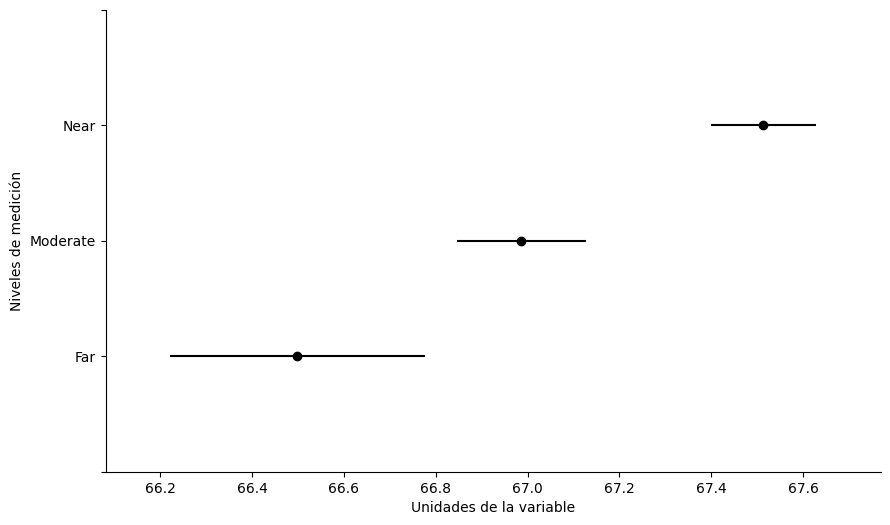

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Distance_from_Home'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Far': 0, 'Moderate': 50, 'Near': 100}
df['Distance_from_Home'] = df['Distance_from_Home'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,0,1,0,0,0,1,3,0,50,100,Male,67
1,19,64,Low,Medium,0,8,59,0,1,2,50,0,-1,4,0,0,50,Female,61
2,24,98,Medium,Medium,1,7,91,50,1,2,50,0,0,4,0,100,100,Male,74
3,29,89,Low,Medium,1,8,98,50,1,1,50,0,-1,4,0,50,50,Male,71
4,19,92,Medium,Medium,1,6,65,50,1,3,50,100,0,4,0,0,100,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,50,1,1,100,0,1,2,0,50,100,Female,68
6603,23,76,High,Medium,0,8,81,50,1,3,0,100,1,2,0,50,100,Female,69
6604,20,90,Medium,Low,1,6,65,0,1,3,0,0,-1,2,0,100,100,Female,68
6605,10,86,High,High,1,6,91,100,1,2,0,0,1,3,0,50,0,Female,68


In [ ]:
#Gender
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Gender)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.377044,2.377044,0.155128,0.693696
Residual,6376.0,97700.219381,15.323121,NaN,NaN


In [3]:
niveles = {'Far': 0, 'Moderate': 50, 'Near': 100}
df['Gender'] = df['Gender'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,NaN,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,NaN,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,NaN,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,NaN,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,NaN,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,NaN,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,NaN,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,NaN,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,NaN,68


In [ ]:
df.drop(columns = ['Gender'], inplace = True)

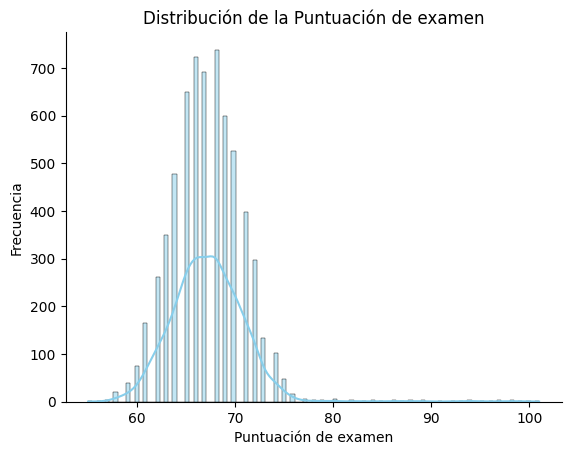

In [ ]:
#Exam Score
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Exam_Score'], kde=True, color='skyblue')
plt.xlabel('Puntuación de examen')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Puntuación de examen')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

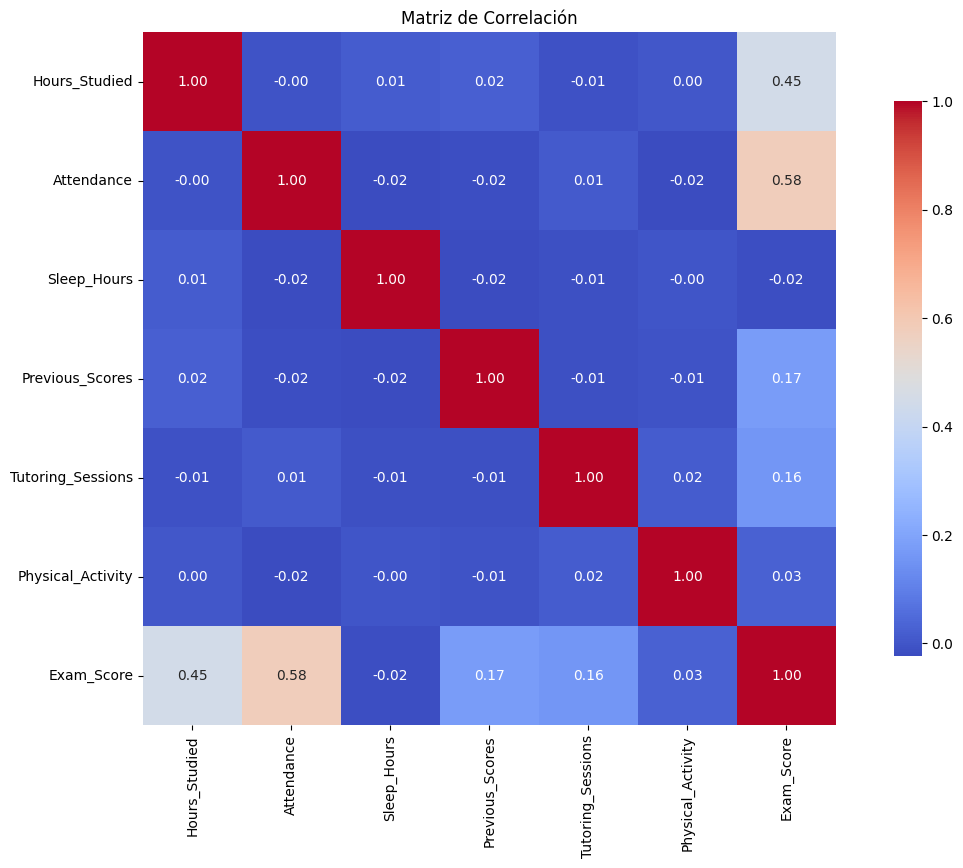

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/StudentPerformanceFactors.csv")
df.dropna(inplace=True)

# Calcular la matriz de correlación
matriz_de_correlación = df.corr(numeric_only=True)

# Graficar el heatmap
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlación, annot = True, cmap = 'coolwarm', fmt = ".2f", square= True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')
plt.show()

Hours_Studied: Presenta una distribución normal sin presencia de datos atípicos. Es una de las variables con mayor correlación positiva con la calificación.

Attendance: También muestra una distribución normal y sin valores atípicos. Tiene una alta correlación con el desempeño académico.

Parental_Involvement: Variable categórica con niveles Low, Medium y High. Se observa una tendencia positiva: a mayor participación de los padres, mejor desempeño del estudiante.

Access_to_Resources: Variable categórica con niveles Low, Medium y High. A mayor acceso a recursos educativos, mejor es la calificación obtenida.

Extracurricular_Activities: Variable binaria con opciones Yes o No. Representa la participación en actividades extracurriculares.

Sleep_Hours: Se distribuye normalmente y no contiene valores atípicos.

Previous_Scores: Presenta una distribución uniforme sin datos atípicos.

Motivation_Level: Variable categórica con niveles Low, Medium y High. Existe una relación directa entre el nivel de motivación y el rendimiento académico.

Internet_Access: Variable binaria (Yes / No). Se observa un mejor desempeño académico en quienes tienen acceso a internet.

Tutoring_Sessions: Su distribución se asemeja a una distribución de Poisson. No se detectan valores atípicos.

Family_Income: Variable categórica con niveles Low, Medium y High. Se aprecia una mejora en la calificación conforme aumenta el ingreso familiar.

Teacher_Quality: Variable categórica con niveles Low, Medium y High, siendo Low y Medium estadísticamente similares.

School_Type: Esta variable fue eliminada por no aportar información relevante al análisis.

Peer_Influence: Variable categórica con niveles Negative, Neutral y Positive. Se observa una mejora en las calificaciones cuando la influencia del entorno social es positiva.

Physical_Activity: Tiene una distribución normal sin datos atípicos.

Learning_Disabilities: Variable binaria (Yes / No). Se detecta una disminución en el rendimiento académico en presencia de discapacidades de aprendizaje.

Parental_Education_Level: Variable categórica con niveles High School, College y Postgraduate. El rendimiento del estudiante mejora conforme aumenta el nivel educativo de los padres.

Distance_from_Home: Variable categórica con niveles Far, Moderate y Near. Los estudiantes que viven más cerca de la escuela tienden a obtener mejores calificaciones.

Gender: Se eliminó esta variable debido a su baja relevancia en el análisis.

Exam_Score: La variable objetivo presenta una distribución normal sin presencia significativa de valores atípicos.

